**Lab 1**

**Topic: "Using K-Means clustering algorithm in Python"**


**Huseyin Tekin IP-98**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
dataset_path = '/lab1/clustering.csv'
pd.set_option('mode.chained_assignment', None)

In [ ]:
data = pd.read_csv(dataset_path)
data.head()

The first five lines of the dataset were obtained, as a result of which it is possible to get acquainted with the properties (columns) of the loaded data set, and to get acquainted with what values these properties can take.

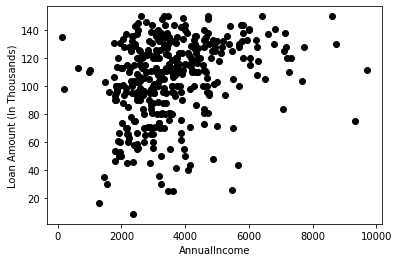

In [ ]:
X = data[["LoanAmount", "ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

A pie chart of the dependence of the loan amount (debt) on the income level was obtained.

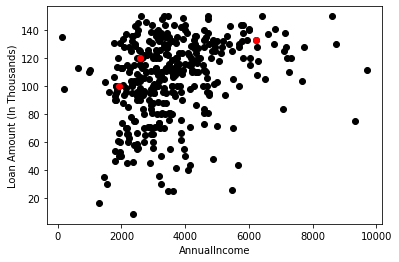

In [ ]:
K=3
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c='black')
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

The same point diagram of the dependence of the loan amount on the income level was obtained, on which the red centroids of the three clusters (because k = 3) are marked with red dots due to the application of the K-Means algorithm.

In [ ]:
diff = 1
j = 0
while(diff != 0):
  XD = X
  i = 1
  for index1, row_c in Centroids.iterrows():
    ED = []
    for index2, row_d in XD.iterrows():
      d1 = (row_c["ApplicantIncome"] - row_d["ApplicantIncome"]) ** 2
      d2 = (row_c["LoanAmount"] - row_d["LoanAmount"]) ** 2
      d = np.sqrt(d1 + d2)
      ED.append(d)
    X[i] = ED
    i = i + 1
  C = []
  for index, row in X.iterrows():
    min_dist = row[1]
    pos = 1
    for i in range(K):
      if row[i + 1] < min_dist:
        min_dist = row[i + 1]
        pos = i + 1
    C.append(pos)
  X["Cluster"] = C
  Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
  if j == 0:
    diff = 1
    j = j + 1
  else:
    diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
    print(diff.sum())
  Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
Centroids

435.7926519434927
244.50614927361295
195.88186492117222
212.11585654878053
320.86544014225217
235.63273762230665
248.74878646215663
125.16501318300665
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


,LoanAmount,ApplicantIncome
Cluster,,
1,109.756410,4033.596154
2,119.488372,6512.767442
3,97.472527,2497.972527


As a result of the program, new centroids of clusters were obtained, for which the average values of the loan amount and the level of income of all points in the cluster to which they belong were shown. The new centroids of the clusters were chosen so that all the nearest points that are part of the cluster of this centroid were as different as possible from the centroids.

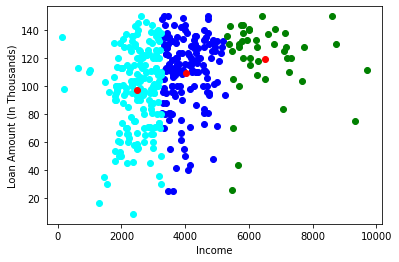

In [ ]:
color=['blue', 'green', 'cyan']
for k in range(K):
  data=X[X["Cluster"] == k+1]
  plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c=color[k])
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

As a result of the program, three scatter plots were plotted, each showing points from a specific cluster and a centroid highlighted in red. Thus, three clusters were obtained from the provided data set using the K-Means algorithm. Each cluster accordingly describes a set of data about people in the bank who have a similar dependence of the loan amount on the level of income.

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("/content/drive/MyDrive/data_colab/lab1/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


The first five lines of the dataset were obtained, as a result of which it is possible to get acquainted with the properties (columns) of the loaded data set, and to get acquainted with what values these properties can take.

You can see the characteristics of the wholesale distributor's customers, namely from which region, what are the costs of milk, groceries, etc.

In [ ]:
# statistics of the data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The table of statistical data on all characteristics (columns) in the dataset is shown, namely: number of values, mean value, minimum, maximum, standard deviation, etc. The average value of some columns is orders of magnitude different from others.

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Due to the normalization of values, all values in the daset were recalculated, so when displaying statistics on all characteristics (columns) in the dataset, we see that the data of different columns do not differ much in order from other columns. Also, the difference between the minimum and maximum value of the characteristic is small. That is, the data are normalized.

In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')
# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [ ]:
# inertia on the fitted data
kmeans.inertia_

2599.3873849123092

The value of inertia was obtained. Inertia is the sum of the distances of all points of a cluster from the centroid of this cluster. That is, it is the intracluster distance. The smaller the value of inertia, the better the clustering. In our case, this value is somewhat large, ie this sum of intracluster distances may indicate that the formed clusters are not very well formed.

Text(0, 0.5, 'Inertia')

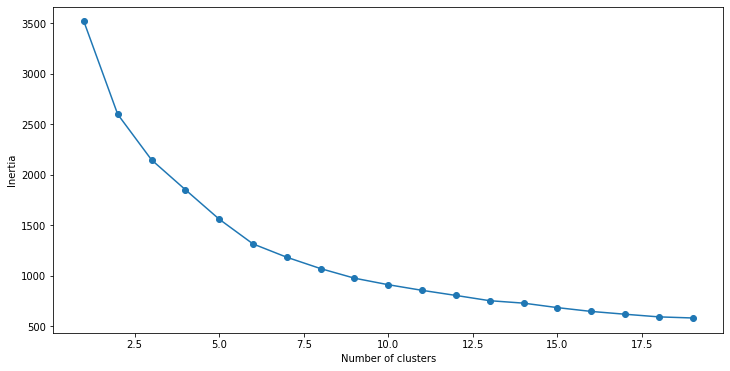

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
  kmeans = KMeans(n_clusters = cluster, init='k-means++')
  kmeans.fit(data_scaled)
  SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

A graph of the dependence of the value of inertia on the number of clusters was obtained. Also known as the elbow curve, where the x-axis represents the number of clusters, and the y-axis is
metric of inertia.

The value of inertia begins to decrease less sharply, starting with the number of clusters of 5 or more. That is, the optimal value of the number of clusters based on this graph is from 5 to 8.

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    237
3    126
2     63
0     12
4      2
Name: cluster, dtype: int64

As a result, the number of clusters was selected - 5 and the number of points in each of the formed clusters was determined. In the first cluster - 209 points, the second - 125, the third - 91, the fourth - 10, the fifth - 5.

As a result of this laboratory work, the K-Means clustering algorithm was developed. It was also practically acquainted with the implementation and application of this algorithm for data analysis in Python. In addition, the K-Means ++ algorithm and other features of data clustering tasks were also considered.

In the first part of the laboratory work, the K-Means algorithm was implemented, the centroids of the clusters and the points closest to the centroid data were determined, and thus the clusters in the loaded dataset were determined.

In the second part of the laboratory work, the clustering algorithm K-Means ++ was applied, normalization was applied to the data in the dataset, and the inertia of the clusters was calculated. An elbow curve was constructed to determine the optimal number of clusters.